In [1]:
import numpy as np
import pandas as pd

In [2]:
import pandas as pd
#List of possible encodings to try 
encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252']
file_path = 'spam.csv' # Change this to the path of your CSV file
# Attempt to read the CSV file with different encodings
for encoding in encodings:
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        print("File successfully read with encoding: {encoding}") 
        break # Stop the Loop if successful
    except UnicodeDecodeError:
        print("Failed to read with encoding: (encoding}")
        continue # Try the next encoding
# If the Loop completes without success, df will not be defined 
if 'df' in locals():
    print("CSV file has been successfully loaded.")
else:
    print("All encoding attempts failed. Unable to read the CSV file.")
       

Failed to read with encoding: (encoding}
File successfully read with encoding: {encoding}
CSV file has been successfully loaded.


In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2814,ham,Some are lasting as much as 2 hours. You might...,NaN,NaN,NaN
2226,ham,If you have belive me. Come to my home.,NaN,NaN,NaN
112,ham,I'm ok wif it cos i like 2 try new things. But...,NaN,NaN,NaN
4072,ham,Was the actual exam harder than NBME,NaN,NaN,NaN
3001,ham,"Excellent, I'll see what riley's plans are",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
#1.data cleaning
#eda
#text preprocessing
#model building
#evaluation
#improvement
#website
#deploy

1.data cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [8]:
df.drop(labels=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis =1,inplace=True)

In [9]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [10]:
df.rename(columns={'v1':'Target','v2':'text'},inplace=True)
df.sample(5)

,Target,text
4392,spam,RECPT 1/3. You have ordered a Ringtone. Your o...
2738,ham,I sent you the prices and do you mean the &lt...
1877,ham,This pen thing is beyond a joke. Wont a Biro d...
3082,ham,K..k:)how about your training process?
4829,ham,"The word \Checkmate\"" in chess comes from the ..."


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['Target'] = encoder.fit_transform(df['Target'])

In [13]:
df.head()

,Target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.isnull().sum()

Target    0
text      0
dtype: int64

In [15]:
df.duplicated().sum()

403

In [16]:
df = df.drop_duplicates(keep = 'first')

In [17]:
df.shape

(5169, 2)

eda

In [18]:
df.head()

,Target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

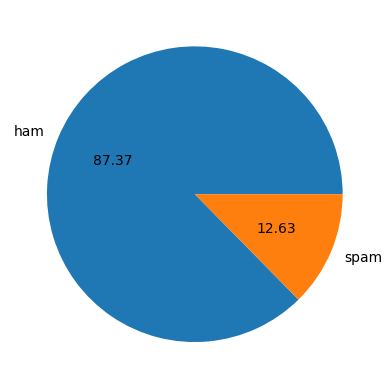

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
import nltk
print(nltk.data.path)

['C:\\Users\\nithin sudheer/nltk_data', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.1776.0_x64__qbz5n2kfra8p0\\nltk_data', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.1776.0_x64__qbz5n2kfra8p0\\share\\nltk_data', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.1776.0_x64__qbz5n2kfra8p0\\lib\\nltk_data', 'C:\\Users\\nithin sudheer\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [22]:
nltk.download('punkt')
print(nltk.data.path)

[nltk_data] Downloading package punkt to C:\Users\nithin
[nltk_data]     sudheer\AppData\Roaming\nltk_data...


['C:\\Users\\nithin sudheer/nltk_data', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.1776.0_x64__qbz5n2kfra8p0\\nltk_data', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.1776.0_x64__qbz5n2kfra8p0\\share\\nltk_data', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.1776.0_x64__qbz5n2kfra8p0\\lib\\nltk_data', 'C:\\Users\\nithin sudheer\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


[nltk_data]   Package punkt is already up-to-date!


In [23]:
df['num_characters'] = df['text'].apply(len)

In [24]:
df.head()

,Target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df.head()

,Target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,Target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
#targeting ham
df[df['Target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
#targeting spam
df[df['Target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [32]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

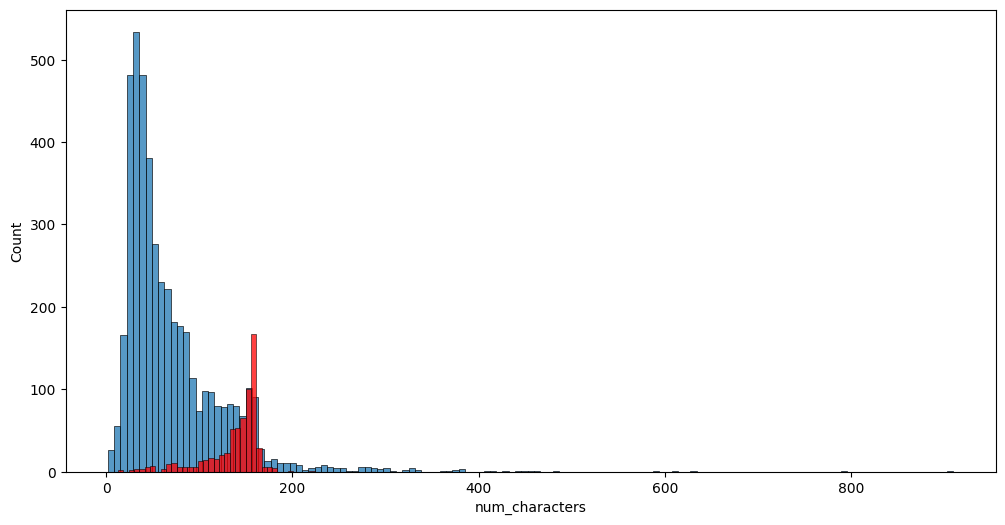

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'],color='red')


<Axes: xlabel='num_words', ylabel='Count'>

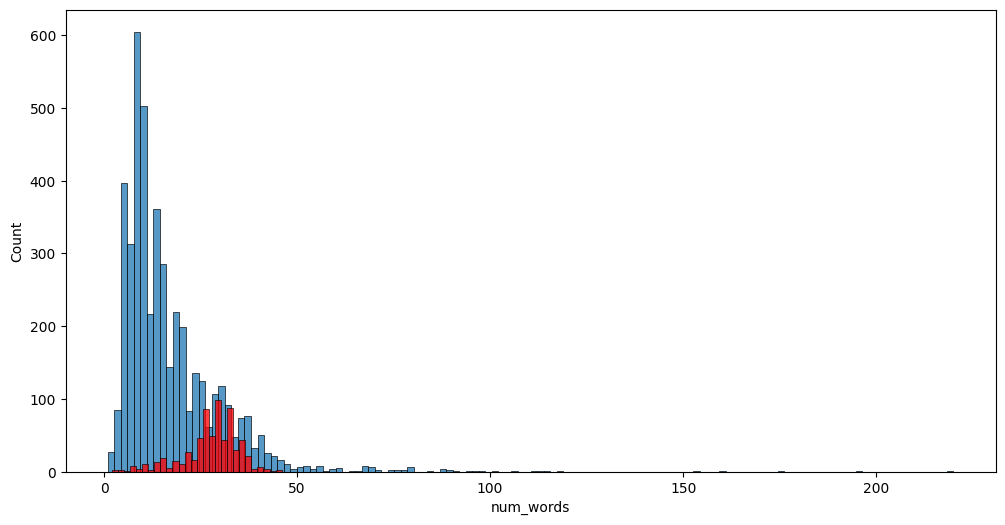

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'],color='red')

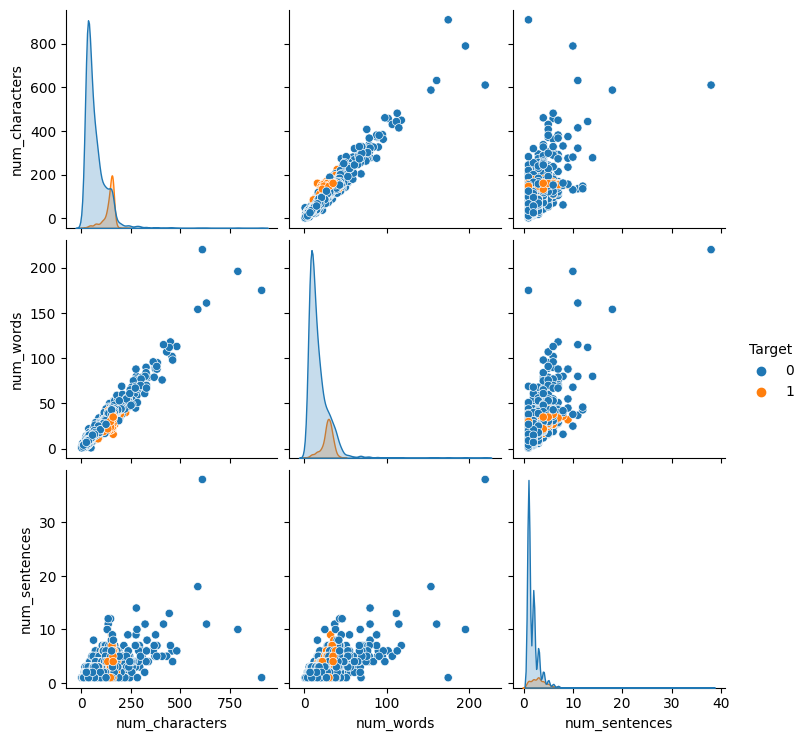

In [35]:
sns.pairplot(df,hue='Target')

data preprocessing

-lower case

-tokenization

-removing special characters

-removing stop word and puncutation

-stemming

In [36]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords')
ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

transformed_text = transform_text("i'm gonna be home soon and i dont want tot takl about this stuff anymore toight, k? i have cried enough today")

print(transformed_text)




gon na home soon dont want tot takl stuff anymor toight k cri enough today


[nltk_data] Downloading package stopwords to C:\Users\nithin
[nltk_data]     sudheer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [38]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')


'love'

In [39]:
df['transformed_text'] = df['text'].apply(transform_text)

In [40]:
df.head()

,Target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [41]:
from wordcloud import WordCloud
wc = WordCloud(width = 500 , height = 500, min_font_size = 10 , background_color = 'white')


In [42]:
spam_wc = wc.generate(df[df['Target']==1]['transformed_text'].str.cat(sep=" "))

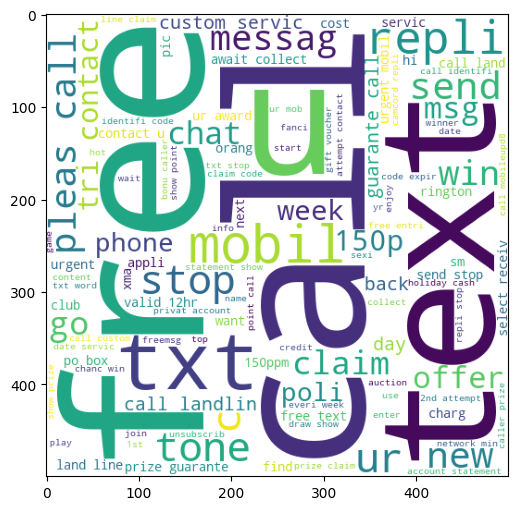

In [43]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [44]:
ham_wc = wc.generate(df[df['Target']==0]['transformed_text'].str.cat(sep=" "))

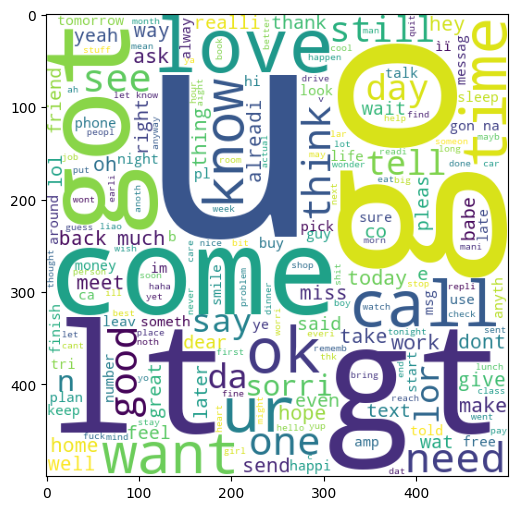

In [45]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [46]:
df.head()

,Target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [47]:
spam_corpus = []
for msg in df[df['Target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [48]:
len(spam_corpus)

9939

In [49]:
from collections import Counter
ham_corpus = []
for msg in df[df['Target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)



In [50]:
len(ham_corpus)

35404

In [51]:
df.head()

,Target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


building model

In [52]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [53]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [54]:
x.shape

(5169, 3000)

In [55]:
y = df['Target'].values

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train , x_test , y_train , y_test  = train_test_split(x,y,test_size=0.2,random_state=2)

In [58]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [59]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [60]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print("Accuracy of Gaussian Naive Bayes: ",accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

Accuracy of Gaussian Naive Bayes:  0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [61]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print("Accuracy of Gaussian Naive Bayes: ",accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

Accuracy of Gaussian Naive Bayes:  0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [62]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print("Accuracy of Gaussian Naive Bayes: ",accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

Accuracy of Gaussian Naive Bayes:  0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [64]:
svc = SVC (kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier (max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='11')
rfc = RandomForestClassifier(n_estimators=50, random_state=2) 
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [65]:
clfs = {'SVC' : svc,'KN' : knc , 'NB' : mnb , 'DT' : dtc , 'LR' : lrc , 'RF' : rfc , 'Adaboost' : abc , 'bgc' : bc , 'ETC' : etc , 'GBDT' : gbdt , 'xgb' : xgb}

In [66]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [67]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [68]:
accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(svc,x_train,y_train,x_test,y_test)
    print("for",name)
    print("accuracy- ",current_accuracy)
    print("precision- ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

for SVC
accuracy-  0.9758220502901354
precision-  0.9747899159663865
for KN
accuracy-  0.9758220502901354
precision-  0.9747899159663865
for NB
accuracy-  0.9758220502901354
precision-  0.9747899159663865
for DT
accuracy-  0.9758220502901354
precision-  0.9747899159663865
for LR
accuracy-  0.9758220502901354
precision-  0.9747899159663865
for RF
accuracy-  0.9758220502901354
precision-  0.9747899159663865
for Adaboost
accuracy-  0.9758220502901354
precision-  0.9747899159663865
for bgc
accuracy-  0.9758220502901354
precision-  0.9747899159663865
for ETC
accuracy-  0.9758220502901354
precision-  0.9747899159663865
for GBDT
accuracy-  0.9758220502901354
precision-  0.9747899159663865
for xgb
accuracy-  0.9758220502901354
precision-  0.9747899159663865


In [69]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores , 'precision': precision_scores}).sort_values('precision',ascending= False)

In [70]:
performance_df

,Algorithm,Accuracy,precision
0,SVC,0.975822,0.97479
1,KN,0.975822,0.97479
2,NB,0.975822,0.97479
3,DT,0.975822,0.97479
4,LR,0.975822,0.97479
5,RF,0.975822,0.97479
6,Adaboost,0.975822,0.97479
7,bgc,0.975822,0.97479
8,ETC,0.975822,0.97479
9,GBDT,0.975822,0.97479


In [71]:
performance_df1 = pd.melt(performance_df,id_vars = "Algorithm")

In [72]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.975822
1,KN,Accuracy,0.975822
2,NB,Accuracy,0.975822
3,DT,Accuracy,0.975822
4,LR,Accuracy,0.975822
5,RF,Accuracy,0.975822
6,Adaboost,Accuracy,0.975822
7,bgc,Accuracy,0.975822
8,ETC,Accuracy,0.975822
9,GBDT,Accuracy,0.975822


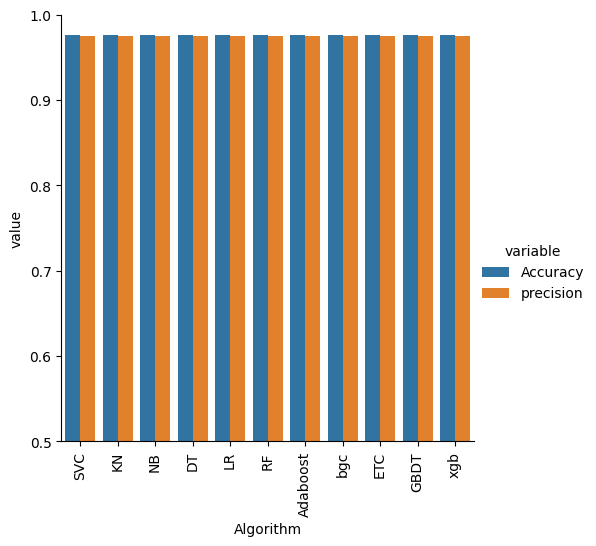

In [73]:
sns.catplot(x = 'Algorithm' , y = 'value', hue = 'variable',data= performance_df1,kind = 'bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation = 'vertical')
plt.show()

In [74]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'precision_max_ft_3000':precision_scores}).sort_values('precision_max_ft_3000',ascending =False)

In [75]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [76]:
new_df_scaled = new_df.merge(temp_df,on = 'Algorithm')

In [77]:
new_df_scaled

,Algorithm,Accuracy,precision,Accuracy_max_ft_3000_x,precision_max_ft_3000_x,Accuracy_max_ft_3000_y,precision_max_ft_3000_y
0,SVC,0.975822,0.97479,0.975822,0.97479,0.975822,0.97479
1,KN,0.975822,0.97479,0.975822,0.97479,0.975822,0.97479
2,NB,0.975822,0.97479,0.975822,0.97479,0.975822,0.97479
3,DT,0.975822,0.97479,0.975822,0.97479,0.975822,0.97479
4,LR,0.975822,0.97479,0.975822,0.97479,0.975822,0.97479
5,RF,0.975822,0.97479,0.975822,0.97479,0.975822,0.97479
6,Adaboost,0.975822,0.97479,0.975822,0.97479,0.975822,0.97479
7,bgc,0.975822,0.97479,0.975822,0.97479,0.975822,0.97479
8,ETC,0.975822,0.97479,0.975822,0.97479,0.975822,0.97479
9,GBDT,0.975822,0.97479,0.975822,0.97479,0.975822,0.97479


In [78]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys,'accuracy_num_chars':accuracy_scores,'precision_num_chars':precision_scores}).sort_values('precision_num_chars',ascending=False)

In [79]:
new_df_scaled.merge(temp_df,on = 'Algorithm')

,Algorithm,Accuracy,precision,Accuracy_max_ft_3000_x,precision_max_ft_3000_x,Accuracy_max_ft_3000_y,precision_max_ft_3000_y,accuracy_num_chars,precision_num_chars


In [80]:
new_df_scaled

,Algorithm,Accuracy,precision,Accuracy_max_ft_3000_x,precision_max_ft_3000_x,Accuracy_max_ft_3000_y,precision_max_ft_3000_y
0,SVC,0.975822,0.97479,0.975822,0.97479,0.975822,0.97479
1,KN,0.975822,0.97479,0.975822,0.97479,0.975822,0.97479
2,NB,0.975822,0.97479,0.975822,0.97479,0.975822,0.97479
3,DT,0.975822,0.97479,0.975822,0.97479,0.975822,0.97479
4,LR,0.975822,0.97479,0.975822,0.97479,0.975822,0.97479
5,RF,0.975822,0.97479,0.975822,0.97479,0.975822,0.97479
6,Adaboost,0.975822,0.97479,0.975822,0.97479,0.975822,0.97479
7,bgc,0.975822,0.97479,0.975822,0.97479,0.975822,0.97479
8,ETC,0.975822,0.97479,0.975822,0.97479,0.975822,0.97479
9,GBDT,0.975822,0.97479,0.975822,0.97479,0.975822,0.97479


In [81]:
svc = SVC(kernel = 'sigmoid',gamma =1.0,probability = True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
from sklearn.ensemble import VotingClassifier

In [82]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [83]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [86]:
y_pred = voting.predict(x_test)
print("accuracy",accuracy_score(y_test,y_pred))
print("precesion",precision_score(y_test,y_pred))

accuracy 0.9816247582205029
precesion 0.9917355371900827


In [87]:
#applying stacking
estimators = [('svm',svc),('nb',mnb),('et',etc)]
final_estimator  = RandomForestClassifier()

In [88]:
from sklearn.ensemble import StackingClassifier

In [89]:
clf = StackingClassifier(estimators=estimators,final_estimator=final_estimator)


In [90]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("accuracy",accuracy_score(y_test,y_pred))
print("precision",precision_score(y_test,y_pred))

accuracy 0.9787234042553191
precision 0.9393939393939394


In [91]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [93]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

#sample text data and corresponding labels
X_train = ["sample text 1","sample etx 2","sample text 3"]
y_train = [0,1,0]

#create and train the Tf-IDF vectorizer
tfidf = TfidfVectorizer(lowercase=True,stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)

#create and train the naive bayes classifier
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

#save the trained TFIDF vectorizer and nave bayes model to files
with open('vectorizer.pkl','wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)

with open('model.pkl','wb') as model_file:
    pickle.dump(mnb, model_file)